 ## **1. Creating the dataframe**

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/ramkrishna1729/Plant-stress-prediction/main/Plant%20stress%20level%20datasheet%20-%20feeds.csv')
data

,CropType,Temperature,Humidity,Soil moisture ( in %),Light intensity,Plant Stress Level
0,Tomato,25,70,65,1200,Low
1,Tomato,32,55,55,600,Moderate
2,Tomato,20,80,70,1800,Low
3,Tomato,30,65,60,1000,Moderate
4,Tomato,18,75,68,2000,Low
...,...,...,...,...,...,...
263,Garden Flower,32,26,8,450,High
264,Garden Flower,33,23,6,400,High
265,Garden Flower,31,31,9,500,High
266,Garden Flower,32,28,7,450,High


## **2. Data Visualization**

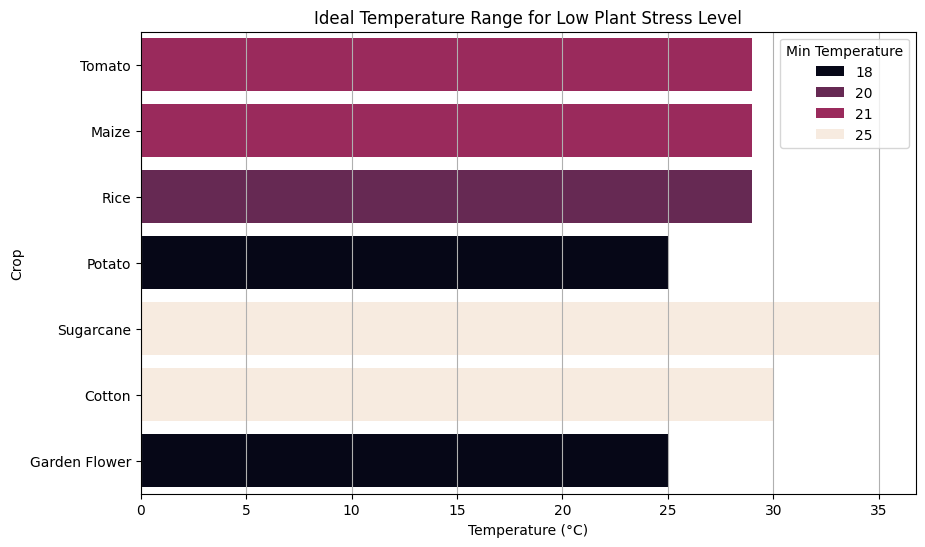

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ideal conditions data with season information
ideal_conditions = {
    'Tomato': {'Temperature': '21°C - 29°C', 'Humidity': '60% - 80%', 'Soil moisture (%)': '60% - 70%', 'Light intensity': '800 - 2500 lux', 'Season': 'Year-round except peak summer (March to June)'},
    'Maize': {'Temperature': '21°C - 29°C', 'Humidity': '60% - 70%', 'Soil moisture (%)': '60% - 70%', 'Light intensity': '800 - 2500 lux', 'Season': 'Summer (March to May) and rainy (June to September) seasons'},
    'Rice': {'Temperature': '20°C - 29°C', 'Humidity': '70% - 80%', 'Soil moisture (%)': '80% - 100%', 'Light intensity': '3000 - 6000 lux', 'Season': 'Summer (March to June) and rainy (June to October) seasons'},
    'Potato': {'Temperature': '18°C - 25°C', 'Humidity': '60% - 80%', 'Soil moisture (%)': '70% - 80%', 'Light intensity': '1000 - 2000 lux', 'Season': 'Winter (October to February) and summer (March to May) seasons'},
    'Sugarcane': {'Temperature': '25°C - 35°C', 'Humidity': '60% - 80%', 'Soil moisture (%)': '70% - 80%', 'Light intensity': '1500 - 2500 lux', 'Season': 'Summer (March to May) and rainy (June to September) seasons'},
    'Cotton': {'Temperature': '25°C - 30°C', 'Humidity': '60% - 80%', 'Soil moisture (%)': '60% - 70%', 'Light intensity': '1000 - 2000 lux', 'Season': 'Kharif (June to October) and Rabi (October to March) seasons'},
    'Garden Flower': {'Temperature': '18°C - 25°C', 'Humidity': '40% - 60%', 'Soil moisture (%)': '21% - 40%', 'Light intensity': '800 - 3000 lux', 'Season': 'Year-round'},
}

# Extract temperature ranges for low stress level for each crop
crops = list(ideal_conditions.keys())
min_temperatures = [int(ideal_conditions[crop]['Temperature'].split(' - ')[0].replace('°C', '')) for crop in crops]
max_temperatures = [int(ideal_conditions[crop]['Temperature'].split(' - ')[1].replace('°C', '')) for crop in crops]

# Create DataFrame for plotting
import pandas as pd
df = pd.DataFrame({'Crop': crops, 'Min Temperature': min_temperatures, 'Max Temperature': max_temperatures})

# Plot using Seaborn with a different color palette
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='Crop', x='Max Temperature', hue='Min Temperature', palette='rocket', dodge=False)
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop')
plt.title('Ideal Temperature Range for Low Plant Stress Level')
plt.grid(axis='x')
plt.show()


Here , we can observe that the maximum ideal temperature for most of the crops is 25°c and minimum is 18°c.

## **3. Feature selection**

In [ ]:
# Dividing into input/ output
X = data[['Temperature', 'Humidity', 'Soil moisture ( in %)', 'Light intensity']] #these features are taken as inputs as these hyperparameters for the model
y = data['Plant Stress Level'] #these features are taken as outputs of the system

## **4. Train-test split**

In [ ]:
# Dividing data set into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # normally 80% of input data is used for traing and 20% is used for testing

## **5. Model selection and fiting**

In [ ]:
from sklearn.ensemble import RandomForestClassifier # classifier used for complex relationships
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train) # X_train represents features( input variables , 2D array like object) and y_train contains targets values(1Darry like object)

RandomForestClassifier(random_state=42)

## **6. Model evaluation**

In [ ]:
# Model evaluation
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9259259259259259


In [ ]:
# Manual input
crop_type = input("Enter crop type (e.g., Tomato, Maize, Rice, etc.): ")
temperature = float(input("Enter temperature: "))
humidity = float(input("Enter humidity: "))
soil_moisture = float(input("Enter soil moisture (%): "))
light_intensity = float(input("Enter light intensity: "))

Enter crop type (e.g., Tomato, Maize, Rice, etc.): Rice
Enter temperature: 45
Enter humidity: 89
Enter soil moisture (%): 56
Enter light intensity: 50


## **7. Predicting the output**

In [ ]:

# Make prediction for manual input
input_data = pd.DataFrame([[temperature, humidity, soil_moisture, light_intensity]], columns=X.columns)
predicted_stress_level = model.predict(input_data)

# Get ideal conditions for the specified crop
ideal_condition = ideal_conditions.get(crop_type)

# Display predicted stress level, ideal conditions, and current conditions
print("Predicted stress level for", crop_type + ":", predicted_stress_level[0])
print("\nIdeal conditions for", crop_type + ":")
for condition, value in ideal_condition.items():
    print(f"{condition}: {value}")
print("\nCurrent conditions:")
print(f"Temperature: {temperature}, Humidity: {humidity}, Soil moisture (%): {soil_moisture}, Light intensity: {light_intensity}")



Predicted stress level for Rice: Moderate

Ideal conditions for Rice:
Temperature: 20°C - 29°C
Humidity: 70% - 80%
Soil moisture (%): 80% - 100%
Light intensity: 3000 - 6000 lux
Season: Summer (March to June) and rainy (June to October) seasons

Current conditions:
Temperature: 45.0, Humidity: 89.0, Soil moisture (%): 56.0, Light intensity: 50.0
